## Walktrap Community Detection

This code uses `CDlib - Community Discovery Library`
See the [link](https://cdlib.readthedocs.io/en/latest/) to check out documentation

In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from cdlib import algorithms
from igraph import *

from modularity_maximization import partition
from modularity_maximization.utils import get_modularity

# import data
dataset = '../dataset/edge_mean_th95.csv' 
df = pd.read_csv(dataset, index_col =0, dtype='int64')

In [2]:
df = df.astype(int)
df = df[['dst','src']]
df

,dst,src
0,6,0
0,94,0
0,136,0
1,2,1
1,59,1
...,...,...
137,123,137
137,127,137
139,17,139
139,106,139


In [3]:
# define edge_list (u,v)
edge_list = list(df.itertuples(index=False, name=None))
print(len(edge_list))
print(edge_list[:5])

338
[(6, 0), (94, 0), (136, 0), (2, 1), (59, 1)]


In [4]:
# define node_list
node_list = [x for x in range(max(df['dst']))]
print(len(node_list))
print(node_list[:5])

141
[0, 1, 2, 3, 4]


In [5]:
# Create Graph 
G = nx.Graph()

# Add node and edge to graph
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

# Delete node which does not have neighborhood
print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
G.remove_nodes_from(list(nx.isolates(G)))
print('Number of node:',len(G.nodes))

Delete node with no neighborhood: [12, 14, 16, 18, 21, 24, 25, 27, 31, 44, 47, 49, 51, 52, 53, 57, 60, 61, 63, 64, 65, 71, 72, 73, 74, 77, 79, 80, 81, 84, 87, 88, 92, 93, 99, 101, 103, 104, 105, 107, 109, 112, 113, 116, 117, 124, 128, 131, 133, 138, 140] 

Number of node: 91


## Walktrap

`Walktrap`, developed by Pascal Pons, is an algorithm in graph theory, used to identify communities in large networks via random walks. These random walks are then used to compute distances between nodes. Nodes are then assigned into groups with small intra and larger inter-community distances via bottom-up hierarchical clustering. It should be noted, of course, that this algorithm considers only one community per node, which in some cases can be an incorrect hypothesis

In [10]:
import cdlib
from cdlib import algorithms

# using networkX Graph
walktrap = cdlib.algorithms.walktrap(G)
walk_comms=walktrap.communities
walk_comms

[[5, 28, 32, 40, 43, 50, 62, 66, 67, 69, 86, 100, 111, 123, 127, 132, 137],
 [0, 6, 8, 30, 36, 37, 46, 58, 75, 94, 102, 110, 119, 136, 141],
 [9, 22, 26, 29, 33, 41, 91, 122, 126, 130],
 [39, 48, 54, 55, 56, 76, 82, 95, 125],
 [7, 38, 70, 78, 90, 120],
 [1, 59, 85, 97],
 [2, 34, 42, 45],
 [4, 15, 114, 121],
 [10, 11, 23, 134],
 [3, 19, 89],
 [17, 106, 139],
 [68, 108, 118],
 [83, 96, 115],
 [13, 98],
 [20, 129],
 [35, 135]]

In [11]:
walktrap_dict = {}

for i, value in enumerate(walk_comms):
    values = list(value)
    for v in values:
        walktrap_dict[v] = i

In [12]:
walktrap_dict

{5: 0,
 28: 0,
 32: 0,
 40: 0,
 43: 0,
 50: 0,
 62: 0,
 66: 0,
 67: 0,
 69: 0,
 86: 0,
 100: 0,
 111: 0,
 123: 0,
 127: 0,
 132: 0,
 137: 0,
 0: 1,
 6: 1,
 8: 1,
 30: 1,
 36: 1,
 37: 1,
 46: 1,
 58: 1,
 75: 1,
 94: 1,
 102: 1,
 110: 1,
 119: 1,
 136: 1,
 141: 1,
 9: 2,
 22: 2,
 26: 2,
 29: 2,
 33: 2,
 41: 2,
 91: 2,
 122: 2,
 126: 2,
 130: 2,
 39: 3,
 48: 3,
 54: 3,
 55: 3,
 56: 3,
 76: 3,
 82: 3,
 95: 3,
 125: 3,
 7: 4,
 38: 4,
 70: 4,
 78: 4,
 90: 4,
 120: 4,
 1: 5,
 59: 5,
 85: 5,
 97: 5,
 2: 6,
 34: 6,
 42: 6,
 45: 6,
 4: 7,
 15: 7,
 114: 7,
 121: 7,
 10: 8,
 11: 8,
 23: 8,
 134: 8,
 3: 9,
 19: 9,
 89: 9,
 17: 10,
 106: 10,
 139: 10,
 68: 11,
 108: 11,
 118: 11,
 83: 12,
 96: 12,
 115: 12,
 13: 13,
 98: 13,
 20: 14,
 129: 14,
 35: 15,
 135: 15}

In [13]:
for comm in set(walktrap_dict.values()):
    print("Community %d"%comm)
    print(comm)
    print(', '.join([str(node) for node in walktrap_dict if walktrap_dict[node] == comm]))

Community 0
0
5, 28, 32, 40, 43, 50, 62, 66, 67, 69, 86, 100, 111, 123, 127, 132, 137
Community 1
1
0, 6, 8, 30, 36, 37, 46, 58, 75, 94, 102, 110, 119, 136, 141
Community 2
2
9, 22, 26, 29, 33, 41, 91, 122, 126, 130
Community 3
3
39, 48, 54, 55, 56, 76, 82, 95, 125
Community 4
4
7, 38, 70, 78, 90, 120
Community 5
5
1, 59, 85, 97
Community 6
6
2, 34, 42, 45
Community 7
7
4, 15, 114, 121
Community 8
8
10, 11, 23, 134
Community 9
9
3, 19, 89
Community 10
10
17, 106, 139
Community 11
11
68, 108, 118
Community 12
12
83, 96, 115
Community 13
13
13, 98
Community 14
14
20, 129
Community 15
15
35, 135


In [14]:
print('Modularity of such partition for karate is %.3f' % get_modularity(G, walktrap_dict))

Calculating modularity for undirected graph
Modularity of such partition for karate is 0.621


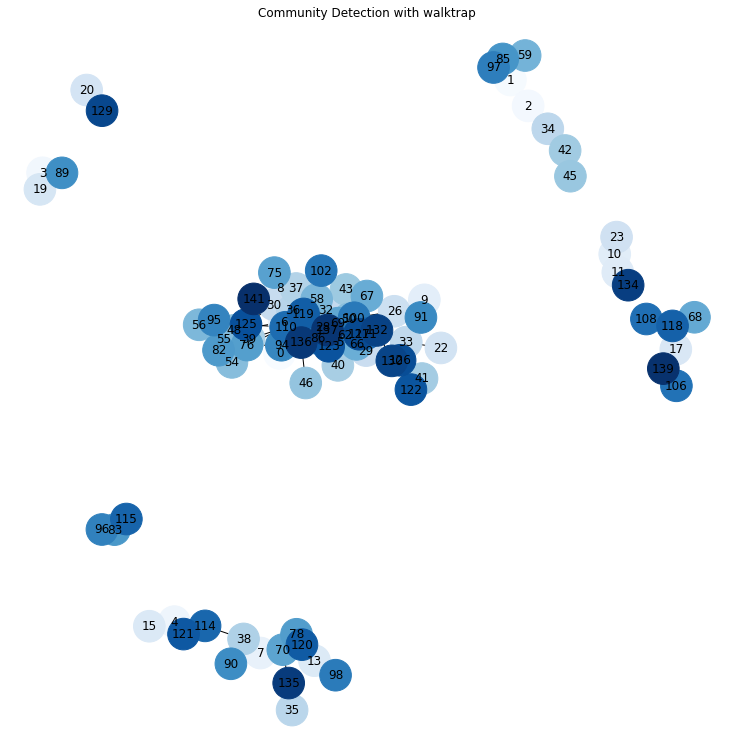

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, scale=4)
nx.draw(G, pos, node_color=range(len(G.nodes)), node_size=1000, with_labels=True, cmap=plt.cm.Blues)
plt.title('Community Detection with walktrap')
plt.show()
plt.savefig('walktrap.jpg')

In [17]:
# # using igraph background
# import cdlib
# from cdlib import algorithms
# import igraph

# graphStyle = {'vertex_size': 12}


# g = igraph.Graph(vertex_attrs={"label": node_list}, edges=edge_list, directed=True)
# g.write_svg("./plot_igraph.svg", width=600, height=600, **graphStyle)

# Performance Metric

In [18]:
edge_mean_th95 = '../dataset/edge_mean_th95.csv' 
edge_mean_top5 = '../dataset/edge_mean_top5.csv'
edge_mice_th95 = '../dataset/edge_mice_th95.csv'
edge_mice_top5 = '../dataset/edge_mice_top5.csv'
edge_grape_th90 = '../dataset/edge_GRAPE_th90.csv'
edge_grape_top5 = '../dataset/edge_GRAPE_top5.csv'
edge_original_th90 = '../dataset/edge_Original_th90.csv'
edge_original_top5 = '../dataset/edge_Original_top5.csv'

incomplete = '../dataset/incomplete.csv'

In [19]:
datalist = [edge_original_th90, edge_original_top5, edge_mean_th95, edge_mean_top5, edge_mice_th95, edge_mice_top5, edge_grape_th90, edge_grape_top5]

In [20]:
def modularity_calculation(dataset):
    print('='*50)
    print(f'[[Dataset: {dataset.split("/")[-1]}]]')
    # import data
    df = pd.read_csv(dataset, index_col =0, dtype='int64')

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

#     # Delete node which does not have neighborhood
#     print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     print('Number of node:',len(G.nodes))
    
    print('{Partition > Eigenvector based clustering}')
    comm_dict = partition(G)

#     for comm in set(comm_dict.values()):
#         print("Community %d"%comm)
#         print(', '.join([str(node) for node in comm_dict if comm_dict[node] == comm]))
        
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, comm_dict))
    print()
    print('-'*20)
    print()
    print('{Modularity Maximization}')
    
    greedy_module_comms = nx.algorithms.community.greedy_modularity_communities(G)
    greedy_dict = {}

    for i, value in enumerate(greedy_module_comms):
        values = list(value)
        for v in values:
            greedy_dict[v] = i

#     for comm in set(greedy_dict.values()):
#         print("Community %d"%comm)
#         print(comm)
#         print(', '.join([str(node) for node in greedy_dict if greedy_dict[node] == comm]))
    
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, greedy_dict))
    print()
    print('-'*20)
    print()
    print('{Betweenness}')
    
    communities = girvan_newman(G, most_valuable_edge=most_central_edge)

    node_groups = []
    for com in next(communities):
        node_groups.append(list(com))

    central_dict = {}
    for i, value in enumerate(node_groups):
        for v in value:
            central_dict[v] = i
    
    
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, central_dict))
    print()
    print('-'*20)
    print()
    print('{WalkTrap}')
        
    walktrap = cdlib.algorithms.walktrap(G)
    walk_comms=walktrap.communities

    walktrap_dict = {}
    for i, value in enumerate(walk_comms):
        values = list(value)
        for v in values:
            walktrap_dict[v] = i
        
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, walktrap_dict))
    print()

In [ ]:
for data in datalist:
    modularity_calculation(data)

[[Dataset: edge_Original_th90.csv]]
{Partition > Eigenvector based clustering}


In [127]:
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

In [129]:
communities = girvan_newman(G, most_valuable_edge=most_central_edge)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))
    
central_dict = {}
for i, value in enumerate(node_groups):
    for v in value:
        central_dict[v] = i